In [101]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

## Lesson 3

In [102]:
samgTrain = pd.read_csv('https://raw.githubusercontent.com/nborwankar/LearnDataScience/master/datasets/samsung/samtrain.csv')
samgVal = pd.read_csv('https://raw.githubusercontent.com/nborwankar/LearnDataScience/master/datasets/samsung/samval.csv')
samgTest = pd.read_csv('https://raw.githubusercontent.com/nborwankar/LearnDataScience/master/datasets/samsung/samtest.csv')

samgTrain = samgTrain.set_index('Unnamed: 0', drop=True)
samgVal = samgVal.set_index('Unnamed: 0', drop=True)
samgTest = samgTest.set_index('Unnamed: 0', drop=True)

In [103]:
# Separate sets in features an outcome
featuresTrain = samgTrain.ix[:, samgTrain.columns != 'activity']
featuresVal = samgVal.ix[:, samgTrain.columns != 'activity']
featuresTest = samgTest.ix[:, samgTrain.columns != 'activity']
outcomeTrain = samgTrain['activity']
outcomeVal = samgVal['activity']
outcomeTest = samgTest['activity']

# Create Random Forest
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
model = rfc.fit(featuresTrain, outcomeTrain)

# Print ranking
print('feature importance ranking:')
print sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), samgTrain), reverse=True)

feature importance ranking:
[(0.1849, 'angleYGravity'), (0.1389, 'angleXGravity'), (0.0562, 'fAccMean'), (0.0522, 'tAccStd'), (0.0504, 'fAccSD'), (0.049, 'fJerkMeanFreq'), (0.0475, 'angleZGravity'), (0.0435, 'tJerkSD'), (0.0417, 'tJerkMean'), (0.0368, 'tGyroJerkMean'), (0.036, 'fGyroMean'), (0.0355, 'tAccMean'), (0.0318, 'fAccSkewness'), (0.0221, 'tGyroMean'), (0.0186, 'fGyroJerkSkewness'), (0.0175, 'fAccKurtosis'), (0.0151, 'fAccMeanFreq'), (0.0127, 'tGyroJerkMagSD'), (0.0092, 'angleGyroGravity'), (0.0082, 'subject'), (0.0078, 'fGyroJerkKurtosis'), (0.0076, 'fGyroKurtosis'), (0.0074, 'fJerkKurtosis'), (0.0073, 'fGyroJerkMeanFreq'), (0.0072, 'fJerkMean'), (0.0069, 'fJerkSD'), (0.0069, 'fGyroJerkSD'), (0.0065, 'angleGyroJerkGravity'), (0.0061, 'tGyroSD'), (0.0048, 'fJerkSkewness'), (0.0048, 'fGyroSD'), (0.0044, 'fGyroSkewness'), (0.0038, 'angleJerkGravity'), (0.0038, 'angleAccGravity'), (0.0036, 'fGyroMeanFreq'), (0.0032, 'fGyroJerkMean')]


In [104]:
# Check accuracy on validation and test sets
accuracy_val, accuracy_test = rfc.score(featuresVal, outcomeVal), rfc.score(featuresTest, outcomeTest)
print('the accuracy for the validation and test sets is {} and {}'.format(accuracy_val, accuracy_test))

the accuracy for the validation and test sets is 0.835436382755 and 0.896296296296


In [105]:
lesson1_oob = rfc.oob_score_
lesson1_oob

0.98403041825095061

In [106]:
# Predict data

predictorVal = rfc.predict(featuresVal)
predictorTest = rfc.predict(featuresTest)
print('Recall score for validation set is {}'.format(recall_score(outcomeVal, predictorVal, average='weighted')))
print('Recall score for test set is {}'.format(recall_score(outcomeTest, predictorTest, average='weighted')))

Recall score for validation set is 0.835436382755
Recall score for test set is 0.896296296296


## Lesson 4

In [107]:
# Concatena training, test and validate sets and rename column names
samsung = pd.concat([samgTrain, samgTest, samgVal])
samsung_col_names = samsung.columns
number = 0
for name in samsung.columns[:-2]:
    samsung = samsung.rename(index=str, columns={name: 'x{}'.format(number)})
    number += 1
print samsung.columns

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       u'x10', u'x11', u'x12', u'x13', u'x14', u'x15', u'x16', u'x17', u'x18',
       u'x19', u'x20', u'x21', u'x22', u'x23', u'x24', u'x25', u'x26', u'x27',
       u'x28', u'x29', u'x30', u'x31', u'x32', u'x33', u'x34', u'subject',
       u'activity'],
      dtype='object')


In [108]:
# Split dataframe into training, test and validate sets under new criteria
samgTrain_2 = samsung[samsung['subject'] >= 27]
samgTest_2 = samsung[samsung['subject'] <= 6]
samgVal_2 = samsung[(samsung['subject'] >= 21) & (samsung['subject'] <= 27)]

In [109]:
# Separate sets in features an object
featuresTrain_2 = samgTrain_2.ix[:, samgTrain.columns != 'activity']
featuresVal_2 = samgVal_2.ix[:, samgTrain.columns != 'activity']
featuresTest_2 = samgTest_2.ix[:, samgTrain.columns != 'activity']
outcomeTrain_2 = samgTrain_2['activity']
outcomeVal_2 = samgVal_2['activity']
outcomeTest_2 = samgTest_2['activity']

# Create Random Forest
rfc_2 = RandomForestClassifier(n_estimators=50, oob_score=True)
model_2 = rfc_2.fit(featuresTrain_2, outcomeTrain_2)

# Print ranking
print('feature importance ranking:')
print sorted(zip(map(lambda x: round(x, 4), rfc_2.feature_importances_), samgTrain_2), reverse=True)

feature importance ranking:
[(0.1608, 'x32'), (0.1452, 'x33'), (0.0968, 'x34'), (0.0595, 'x2'), (0.0585, 'x8'), (0.0536, 'x1'), (0.049, 'x0'), (0.0456, 'x6'), (0.0453, 'x9'), (0.0342, 'x24'), (0.0341, 'x23'), (0.0304, 'x4'), (0.0236, 'x7'), (0.02, 'x14'), (0.0147, 'x13'), (0.0141, 'x3'), (0.0134, 'x18'), (0.0117, 'x20'), (0.01, 'x5'), (0.01, 'x10'), (0.0095, 'x30'), (0.0094, 'x31'), (0.0058, 'x19'), (0.0053, 'x21'), (0.005, 'x11'), (0.0048, 'x26'), (0.0047, 'x22'), (0.0044, 'subject'), (0.0033, 'x12'), (0.0032, 'x25'), (0.0031, 'x27'), (0.0029, 'x28'), (0.0024, 'x15'), (0.0021, 'x29'), (0.0021, 'x16'), (0.0016, 'x17')]


In [110]:
lesson2_oob = rfc_2.oob_score_
lesson2_oob

0.9811447811447811

In [111]:
d = {"lesson1_oob": lesson1_oob, "lesson2_oob": lesson2_oob}
print("{} has a higher oob_score with {} compared to {}".format(max(d, key=d.get), max(lesson1_oob, lesson2_oob), min(lesson1_oob, lesson2_oob)))

lesson1_oob has a higher oob_score with 0.984030418251 compared to 0.981144781145


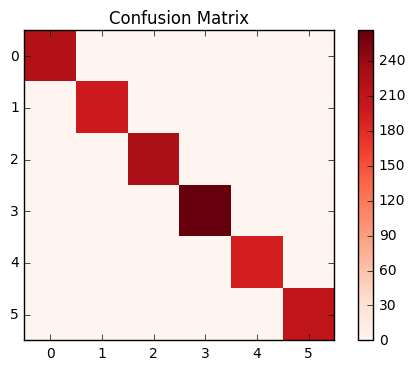

In [112]:
# Confussion Matrix
cnf_matrix = confusion_matrix(outcomeTest_2, predictorTest_2)
np.set_printoptions(precision=2)

plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [116]:
samsung_col_names = samsung.columns
print sorted(zip(map(lambda x: round(x, 4), rfc_2.feature_importances_), samsung), reverse=True)

[(0.1608, 'angleXGravity'), (0.1452, 'angleYGravity'), (0.0968, 'angleZGravity'), (0.0595, 'tJerkMean'), (0.0585, 'fAccMean'), (0.0536, 'tAccStd'), (0.049, 'tAccMean'), (0.0456, 'tGyroJerkMean'), (0.0453, 'fAccSD'), (0.0342, 'fAccKurtosis'), (0.0341, 'fGyroJerkSkewness'), (0.0304, 'tGyroMean'), (0.0236, 'tGyroJerkMagSD'), (0.02, 'fGyroMean'), (0.0147, 'fJerkMeanFreq'), (0.0141, 'tJerkSD'), (0.0134, 'fGyroJerkSD'), (0.0117, 'fAccSkewness'), (0.01, 'tGyroSD'), (0.01, 'fAccMeanFreq'), (0.0095, 'angleGyroGravity'), (0.0094, 'angleGyroJerkGravity'), (0.0058, 'fGyroJerkMeanFreq'), (0.0053, 'fJerkSkewness'), (0.005, 'fJerkMean'), (0.0048, 'fGyroKurtosis'), (0.0047, 'fGyroSkewness'), (0.0044, 'subject'), (0.0033, 'fJerkSD'), (0.0032, 'fJerkKurtosis'), (0.0031, 'fGyroJerkKurtosis'), (0.0029, 'angleAccGravity'), (0.0024, 'fGyroSD'), (0.0021, 'fGyroMeanFreq'), (0.0021, 'angleJerkGravity'), (0.0016, 'fGyroJerkMean')]
